# Data preprocessing: data imputation with statistics

In the previous notebook, we conducted data imputation with by grouping and substitutions with semantically similar columns.

In this notebook, we impute the rest of the data using statistical approaches (mean, median, etc.)

# Data & Package import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../database/2016-2022_semantic_imputation.csv')

In [3]:
df.head(3)

,year,ID,ticker,company_name,market_cap,bic_level_2,bic_level_3,unequal_voting,ceo_tenure,ipo_date,...,dividend_to_common,dividend_to_preferred,dividend_payout_ratio,total_compensation_to_executives,total_compensation_to_board_members,institution_ownership_percentage,asset_to_equity,cash_conversion_cycle,final_shares_outstanding,targeted
0,2016,1518855D US Equity,1518855D,Yahoo! Inc - Set up for Fundam,3.690000e+10,Media,Internet Media & Services,0.0,9.00000,NaN,...,0.000000e+00,0.0,-0.000,8510000.0,1150000.000,NaN,1.57,NaN,954000000.0,0
1,2016,1539941D UN Equity,1539941D,Spectra Energy LLC,2.880000e+10,Oil & Gas,Oil & Gas Producers,0.0,4.25000,NaN,...,1.090000e+09,NaN,345.473,23471757.0,3602528.659,41.5,3.00,14.6,702000000.0,0
2,2016,1556442D UA Equity,1556442D,GigPeak Inc,1.710000e+08,Tech Hardware & Semiconductors,Semiconductors,0.0,9.66667,NaN,...,0.000000e+00,0.0,0.000,126000000.0,NaN,NaN,1.30,173.0,67700000.0,0


#### Before proceeding with the data imputation, we make a new column *missing_values* that stores the number of missing values for each row

In [4]:
df['missing_values'] = df.isnull().sum(axis=1)

# A. Binary variables

- 1. unequal_voting
- 2. classified_board_system
- 3. poison_pill

# 1. unequal_voting

unify the data type first.

In [5]:
unique_values = df['unequal_voting'].unique()
for value in unique_values:
    print(f"Value: {value}, Type: {type(value)}")

Value: 0.0, Type: <class 'numpy.float64'>
Value: 1.0, Type: <class 'numpy.float64'>
Value: nan, Type: <class 'numpy.float64'>


In [6]:
def transform_value(value):
    if value in ['0', '0.0', 0.0]:
        return 0.0
    elif value in ['1', '1.0', 1.0]:
        return 1.0
    else:
        return np.nan

df['unequal_voting'] = df['unequal_voting'].apply(transform_value)

### 1.1. pie chart

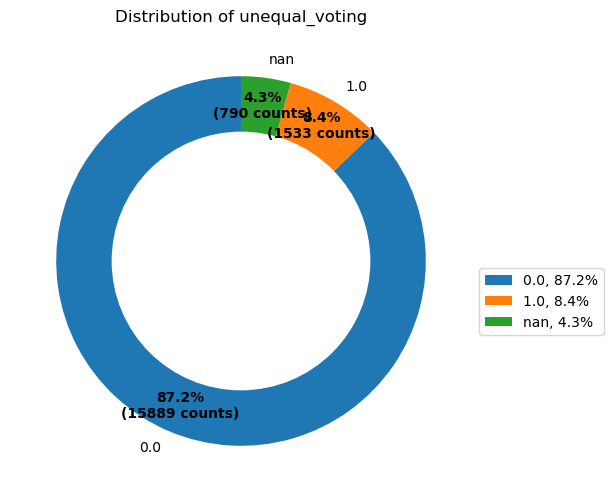

In [7]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} counts)".format(pct, absolute)

plt.figure(figsize=(6, 6))  #
value_counts = df['unequal_voting'].value_counts(dropna=False)
wedges, texts, autotexts = plt.pie(value_counts, 
                                   autopct=lambda pct: func(pct, value_counts), 
                                   startangle=90, 
                                   pctdistance=0.85, 
                                   labels=value_counts.index)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.setp(autotexts, size=10, weight="bold")
plt.title('Distribution of unequal_voting')
plt.legend(loc="best", bbox_to_anchor=(1, 0.5), labels=['%s, %1.1f%%' % (l, (float(s) / sum(value_counts) * 100)) for l, s in zip(value_counts.index, value_counts)])
plt.show()

### 1.2. data imputation

As the majority of the companies do not have voting rights, we fill the null values with zero as well.

In [8]:
df['unequal_voting'].fillna(0.0, inplace=True)
# mean_value = df['unequal_voting'].mean()
# df['unequal_voting'].fillna(mean_value, inplace=True)

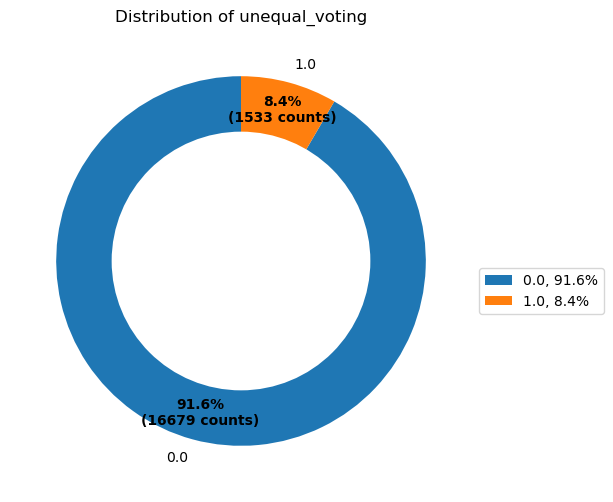

In [9]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} counts)".format(pct, absolute)

plt.figure(figsize=(6, 6))  #
value_counts = df['unequal_voting'].value_counts(dropna=False)
wedges, texts, autotexts = plt.pie(value_counts, 
                                   autopct=lambda pct: func(pct, value_counts), 
                                   startangle=90, 
                                   pctdistance=0.85, 
                                   labels=value_counts.index)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.setp(autotexts, size=10, weight="bold")
plt.title('Distribution of unequal_voting')
plt.legend(loc="best", bbox_to_anchor=(1, 0.5), labels=['%s, %1.1f%%' % (l, (float(s) / sum(value_counts) * 100)) for l, s in zip(value_counts.index, value_counts)])
plt.show()

# 2. classified_board_system

### 2.1 pie chart

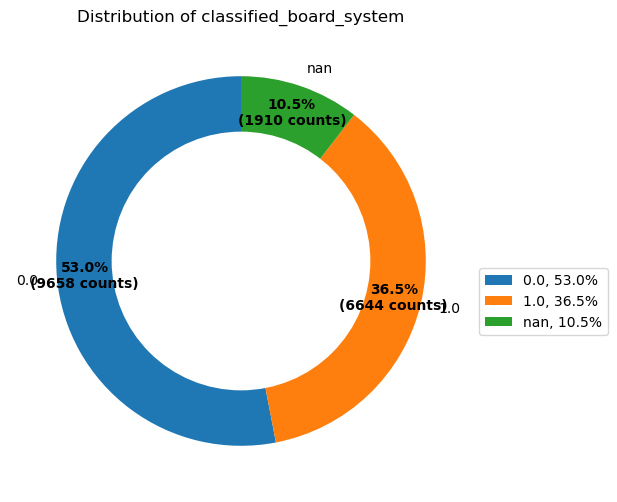

In [10]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} counts)".format(pct, absolute)

plt.figure(figsize=(6, 6))  
value_counts = df['classified_board_system'].value_counts(dropna=False)
wedges, texts, autotexts = plt.pie(value_counts, 
                                   autopct=lambda pct: func(pct, value_counts), 
                                   startangle=90, 
                                   pctdistance=0.85, 
                                   labels=value_counts.index)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.setp(autotexts, size=10, weight="bold")
plt.title('Distribution of classified_board_system')
plt.legend(loc="best", bbox_to_anchor=(1, 0.5), labels=['%s, %1.1f%%' % (l, (float(s) / sum(value_counts) * 100)) for l, s in zip(value_counts.index, value_counts)])
plt.show()

### 2.2. data imputation

As there is a balanced distribution of the binary variable classified_board_system, impute the missing data with the mean value.

In [11]:
mean_value = df['classified_board_system'].mean()
df['classified_board_system'].fillna(mean_value, inplace=True)

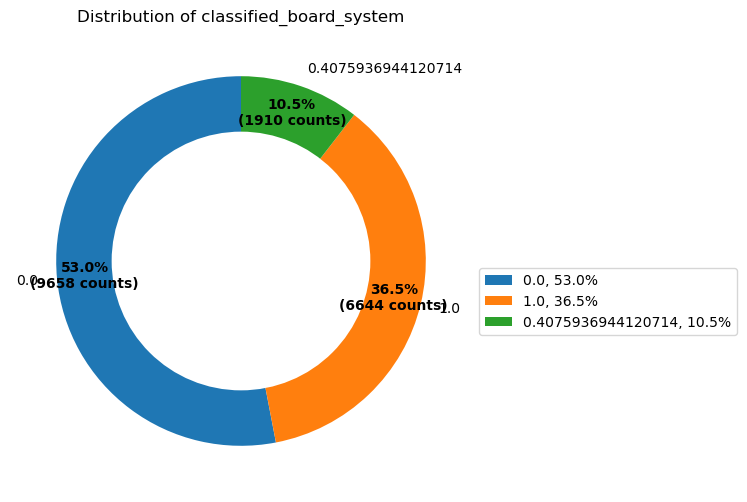

In [12]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} counts)".format(pct, absolute)

plt.figure(figsize=(6, 6))  
value_counts = df['classified_board_system'].value_counts(dropna=False)
wedges, texts, autotexts = plt.pie(value_counts, 
                                   autopct=lambda pct: func(pct, value_counts), 
                                   startangle=90, 
                                   pctdistance=0.85, 
                                   labels=value_counts.index)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.setp(autotexts, size=10, weight="bold")
plt.title('Distribution of classified_board_system')
plt.legend(loc="best", bbox_to_anchor=(1, 0.5), labels=['%s, %1.1f%%' % (l, (float(s) / sum(value_counts) * 100)) for l, s in zip(value_counts.index, value_counts)])
plt.show()

# 3. poison_pill

We first unify the data types.

In [13]:
unique_values = df['poison_pill'].unique()
for value in unique_values:
    print(f"Value: {value}, Type: {type(value)}")

Value: 0.0, Type: <class 'numpy.float64'>
Value: 1.0, Type: <class 'numpy.float64'>
Value: nan, Type: <class 'numpy.float64'>


In [14]:
df['poison_pill'] = df['poison_pill'].apply(transform_value)

### 3.1. pie chart

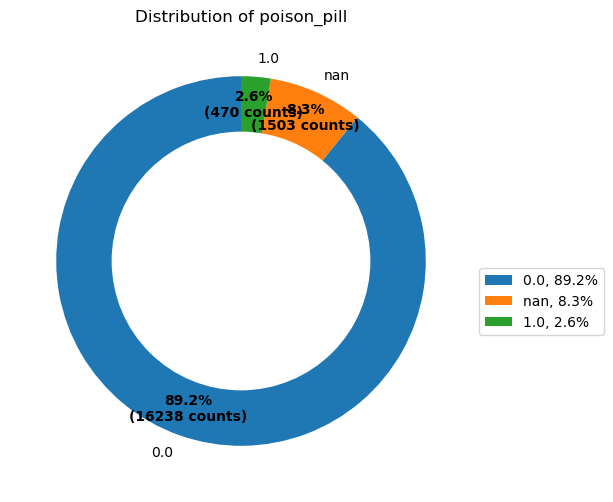

In [15]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} counts)".format(pct, absolute)

plt.figure(figsize=(6, 6))  
value_counts = df['poison_pill'].value_counts(dropna=False)
wedges, texts, autotexts = plt.pie(value_counts, 
                                   autopct=lambda pct: func(pct, value_counts), 
                                   startangle=90, 
                                   pctdistance=0.85, 
                                   labels=value_counts.index)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.setp(autotexts, size=10, weight="bold")
plt.title('Distribution of poison_pill')
plt.legend(loc="best", bbox_to_anchor=(1, 0.5), labels=['%s, %1.1f%%' % (l, (float(s) / sum(value_counts) * 100)) for l, s in zip(value_counts.index, value_counts)])
plt.show()

### 3.2 data imputation

As the majority of the companies do not have the poison pill plan, we fill in the missing values as 0 as well.

In [16]:
df['poison_pill'].fillna(0.0, inplace=True)
# mean_value = df['poison_pill'].mean()
# df['poison_pill'].fillna(mean_value, inplace=True)

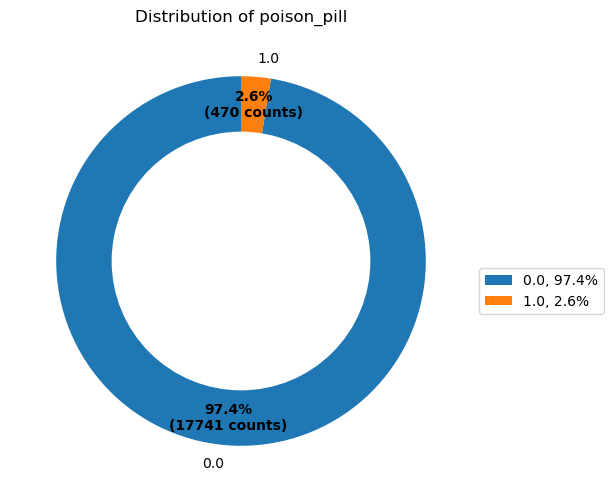

In [17]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} counts)".format(pct, absolute)

plt.figure(figsize=(6, 6))  
value_counts = df['poison_pill'].value_counts(dropna=False)
wedges, texts, autotexts = plt.pie(value_counts, 
                                   autopct=lambda pct: func(pct, value_counts), 
                                   startangle=90, 
                                   pctdistance=0.85, 
                                   labels=value_counts.index)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.setp(autotexts, size=10, weight="bold")
plt.title('Distribution of poison_pill')
plt.legend(loc="best", bbox_to_anchor=(1, 0.5), labels=['%s, %1.1f%%' % (l, (float(s) / sum(value_counts) * 100)) for l, s in zip(value_counts.index, value_counts)])
plt.show()

## Binary values summary:

For three binary values, we executed data imputation as such:
- unequal_voting: As 87.2% was 0, we imputed the N/A with 0 too.
- classified_board_system: As there was a even distribution of 0 and 1, we imputed the N/A with the mean value (~0.4)
- poison_pill: As 89.2% was 0, we imputed the N/A with 0 too. 

# B. Non-ratio variables

For non-ratio variables, the magnitudes of numbers tend to go along with the market cap of companies.
Therefore, we make these columns for each of them:

1. percentile rank
2. market_cap - 10 bins - percentile rank
3. market_cap - 10 bins - normalized
4. market_cap - divide by market_cap
5. market_cap - divide by log(market_cap)
6. raw values

In order to do so, we first need to deal with the column **market_cap**: We fill the value of market_cap with the **median** value of each year.

In [18]:
total_rows = len(df)
market_cap_missing = df['market_cap'].isna().sum()
market_cap_percentage = (market_cap_missing / total_rows) * 100
print(f"Rows where 'market_cap' is missing: {market_cap_missing} ({market_cap_percentage:.2f}%)")

Rows where 'market_cap' is missing: 18 (0.10%)


In [19]:
# Filter rows where 'market_cap' is missing
missing_market_cap_rows = df[df['market_cap'].isna()]
# Count missing values for each of these rows
missing_values_counts = missing_market_cap_rows.isna().sum(axis=1)

for index, count in missing_values_counts.items():
    year_value = missing_market_cap_rows.loc[index, 'year']
    ID_value = missing_market_cap_rows.loc[index, 'ID']
    print(f"Row index {index} with Year: {year_value} and ID: {ID_value} has {count} missing values. (index: {index})")


Row index 28 with Year: 2016 and ID: 1872828D UW Equity has 63 missing values. (index: 28)
Row index 80 with Year: 2016 and ID: 9876588D UW Equity has 63 missing values. (index: 80)
Row index 94 with Year: 2016 and ID: 9995522D UW Equity has 63 missing values. (index: 94)
Row index 2559 with Year: 2016 and ID: VR UN Equity has 71 missing values. (index: 2559)
Row index 2743 with Year: 2017 and ID: 1872828D UW Equity has 63 missing values. (index: 2743)
Row index 2778 with Year: 2017 and ID: 9876588D UW Equity has 64 missing values. (index: 2778)
Row index 2791 with Year: 2017 and ID: 9995522D UW Equity has 62 missing values. (index: 2791)
Row index 5204 with Year: 2017 and ID: VR has 73 missing values. (index: 5204)
Row index 5365 with Year: 2018 and ID: 1872828D UW Equity has 64 missing values. (index: 5365)
Row index 5394 with Year: 2018 and ID: 9876588D UW Equity has 64 missing values. (index: 5394)
Row index 5410 with Year: 2018 and ID: 9992011D UN Equity has 17 missing values. (in

In [20]:
 # Calculate the median value of 'market_cap' for each year
median_values_per_year = df.groupby('year')['market_cap'].transform('median')

# Impute missing values in 'market_cap' with the median value of the respective year
df['market_cap'].fillna(median_values_per_year, inplace=True)

Then, we do the make new columns as explained above

## All the non-ratio variables are shown below:
- capex
- net_capex
- short_term_wc
- long_term_wc
- ebitda
- ebit
- net_income
- net_debt
- ev
- repurchase
- net_repurchase
- total_compensation_to_executives
- total_compensation_to_board_members


## As mentioned, we do these 6 operations as shown below:
1. **_percentile**
    - stores the percentile rank grouped by each year (0-100).
    - missing values are filled with 50.
2. **_10bins_percentile**
    - stores the percentile rank grouped by each year and 10 bins of market cap.
    - missing values are filled with 50.
3. **_10bins_normalized**
    - stores the percentile rank grouped by each year and 10 bins of market cap in each year.
    - missing values are filled with 0.
4. **_div_market_cap**
    - stores the value divided by market_cap
    - missing values are filled with median values.
5. **_div_log_market_cap**
    - stores the value divided by logarithm of market_cap.
    - missing values are filled with median values.
6. **original**
    - missing values are filled with median values

In [21]:
columns_to_process = [
    "capex",
    "net_capex",
    "short_term_wc",
    "long_term_wc",
    "ebitda",
    "ebit",
    "net_income",
    "net_debt",
    "ev",
    "repurchase",
    "board_size",
    "net_repurchase",
    "total_compensation_to_executives",
    "total_compensation_to_board_members"
]

print(f"{'Column':<40} {'Missing rows':<15} {'Percentage':<10}")
print('-' * 70) 
for col in columns_to_process:
    
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    missing_rows = df[col].isna().sum()
    total_rows = len(df)
    missing_percentage = (missing_rows / total_rows) * 100
    print(f"{col:<40} {missing_rows:<15} {missing_percentage:.2f}%")
    
    # 1. _percentile
    percentile_col = col + '_percentile'
    df[percentile_col] = df.groupby('year')[col].transform(lambda x: x.rank(pct=True) * 100)
    df[percentile_col].fillna(50, inplace=True)
    
    # 2. _10bins_percentile
    df['market_cap_bins'] = df.groupby('year')['market_cap'].transform(lambda x: pd.cut(x, bins=10))
    percentile_10bins_col = col + '_10bins_percentile'
    df[percentile_10bins_col] = df.groupby(['year', 'market_cap_bins'])[col].transform(lambda x: x.rank(pct=True) * 100)
    df[percentile_10bins_col].fillna(50, inplace=True)
    df.drop('market_cap_bins', axis=1, inplace=True)

    # 3. _10bins_normalized
    df['market_cap_bins'] = df.groupby('year')['market_cap'].transform(lambda x: pd.qcut(x, 10, labels=False, duplicates='drop'))
    normalized_col = col + '_10bins_normalized'
    df[normalized_col] = df.groupby(['year', 'market_cap_bins'])[col].transform(lambda x: (x - x.mean()) / x.std())
    df[normalized_col].fillna(0, inplace=True)
    df.drop('market_cap_bins', axis=1, inplace=True)

    
    # 4. _div_market_cap
    div_market_cap_col = col + '_div_market_cap'
    df[div_market_cap_col] = df[col] / df['market_cap']
    
    # 5. _div_log_market_cap
    df['log_market_cap'] = np.log(df['market_cap'])
    div_log_market_cap_col = col + '_div_log_market_cap'
    df[div_log_market_cap_col] = df[col] / df['log_market_cap']
    
    for new_col in [div_market_cap_col, div_log_market_cap_col]:
        median_values = df.groupby('year')[new_col].transform('median')
        df[new_col].fillna(median_values, inplace=True)
    df.drop('log_market_cap', axis=1, inplace=True)
    
    # 6. raw values
    df[col].fillna(df.groupby('year')[col].transform('median'), inplace=True)


Column                                   Missing rows    Percentage
----------------------------------------------------------------------
capex                                    772             4.24%
net_capex                                772             4.24%
short_term_wc                            5475            30.06%
long_term_wc                             4655            25.56%
ebitda                                   2099            11.52%
ebit                                     2099            11.52%
net_income                               182             1.00%
net_debt                                 125             0.69%
ev                                       2087            11.46%
repurchase                               6782            37.24%
board_size                               470             2.58%
net_repurchase                           6782            37.24%
total_compensation_to_executives         790             4.34%
total_compensation_to_board_members

# C. ratio variables (non-technical)

For the ratio variables, the values are often comparable with the industry peers. Therefore, we create the new columns as shown below:
1. **_industry_peers_percentile**
    - Group the companies by industry and year, and compute the percentile
    - Fill the missing values with 50.
2. **_industry_peers_normalized**
    - Group the companies by industry and year, and compute the percentile
    - Fill the missing values with 0.
3. **original**
    - Fill the missing values with the median value

### The ratio variables are shown below:
- ebitda_margin
- operating_margin
- sales_to_total_assets
- normalized_roe
- operating_roe
- operating_roic
- eps_adjusted_diluted
- ev_to_sales
- tobin_q_ratio
- pb_ratio
- fcf_to_equity
- sales_growth_rate
- dividend_per_share
- dividend_payout_ratio
- asset_to_equity
- cash_conversion_cycle
- ev_ebitda
- ev_ebit

#### First, we make ev_ebitda and ev_ebit as shown below:

In [22]:
df['ev_ebitda'] = np.where((df['ev'] != 0) & (df['ebitda'] != 0), df['ev'] / df['ebitda'], np.nan)
df['ev_ebit'] = np.where((df['ev'] != 0) & (df['ebit'] != 0), df['ev'] / df['ebit'], np.nan)

#### Then, we execute the operation as shown above.

We first group the dataframe df by 'year', and print all the unique values of 'bic_level_2' and "bic_level_3" with the number of counts for each year

In [23]:
grouped_by_year = df.groupby('year')

for year, group in grouped_by_year:
    print(f"Year: {year}")
    
    # Unique values and counts for 'bic_level_2'
    bic_level_2_counts = group['bic_level_2'].value_counts()
    print("\nUnique values for 'bic_level_2':")
    print(bic_level_2_counts)
    
    # Unique values and counts for 'bic_level_3'
    bic_level_3_counts = group['bic_level_3'].value_counts()
    print("\nUnique values for 'bic_level_3':")
    print(bic_level_3_counts)
    
    print("\n" + "-"*50 + "\n")


Year: 2016

Unique values for 'bic_level_2':
Health Care                        421
Banking                            272
Software & Tech Services           208
Real Estate                        179
Industrial Services                178
Industrial Products                172
Tech Hardware & Semiconductors     142
Financial Services                 141
Materials                          135
Oil & Gas                          123
Consumer Discretionary Products    122
Retail & Whsle - Discretionary     109
Consumer Discretionary Services    101
Insurance                           91
Media                               88
Consumer Staple Products            82
Utilities                           77
Telecommunications                  39
Retail & Wholesale - Staples        30
Renewable Energy                    15
Name: bic_level_2, dtype: int64

Unique values for 'bic_level_3':
Banking                            272
Biotech & Pharma                   231
REIT                           

#### Bloomberg's model implemented such a policy:  
*When factors are created from ranking against industry peers, BICS (Bloomberg Industry Classification System) Level 3 industries are used. If a company is the only member of its industry in the universe (Russell 3000), then BICS Level 2 industry groups are used.*

However, our model sets the bar a bit higher so that it will use BICs Level 2 when there are fewer than 10 companies in the same group when grouped by BICS Level 3. 

In [24]:
columns_to_process = [
    "ebitda_margin",
    "operating_margin",
    "sales_to_total_assets",
    "normalized_roe",
    "operating_roe",
    "operating_roic",
    "eps_adjusted_diluted",
    "ev_to_sales",
    "tobin_q_ratio",
    "pb_ratio",
    "pe_ratio",
    "fcf_to_equity",
    "sales_growth_rate",
    "dividend_per_share",
    "dividend_payout_ratio",
    "asset_to_equity",
    "cash_conversion_cycle",
    "ev_ebitda",
    "ev_ebit"
]

def compute_percentile(group):
    if len(group) < 10:
        return pd.Series([None] * len(group), index=group.index, dtype=float)
    return group.rank(pct=True) * 100

def normalize(group):
    if len(group) < 10:
        return pd.Series([None] * len(group), index=group.index, dtype=float)
    return (group - group.mean()) / group.std()

for col in columns_to_process:
    
    # 1. _industry_peers_percentile
    percentile_col = col + '_industry_peers_percentile'
    df[percentile_col] = df.groupby(['year', 'bic_level_3'])[col].transform(compute_percentile)
    mask = df[percentile_col].isna()
    df.loc[mask, percentile_col] = df[mask].groupby(['year', 'bic_level_2'])[col].transform(compute_percentile)
    df[percentile_col].fillna(50, inplace=True)
    df[percentile_col] = df[percentile_col].astype(float)

    # 2. _industry_peers_normalized
    normalized_col = col + '_industry_peers_normalized'
    df[normalized_col] = df.groupby(['year', 'bic_level_3'])[col].transform(normalize)
    mask = df[normalized_col].isna()
    df.loc[mask, normalized_col] = df[mask].groupby(['year', 'bic_level_2'])[col].transform(normalize)
    df[normalized_col].fillna(0, inplace=True)
    df[normalized_col] = df[normalized_col].astype(float)
    
    # 3. original
    df[col].fillna(df.groupby('year')[col].transform('median'), inplace=True)


# C. technical variables

For all the technical variables, we simply fill the missing values with median for each year. 

#### The technical variables are shown below:
- free_float_percentage
- rsi_14d
- rsi_30d
- volatility_30d
- volatility_90d
- volatility_180d
- volume_30d_average_to_outstanding
- insider_shares_percentage
- institution_ownership_percentage
- ceo_tenure
- total_return_5y
- total_return_4y
- total_return_3y
- total_return_2y
- total_return_1y
- total_return_6m
- total_return_3m

In [25]:
technical_variables = [
    "free_float_percentage",
    "rsi_14d",
    "rsi_30d",
    "volatility_30d",
    "volatility_90d",
    "volatility_180d",
    "volume_30d_average_to_outstanding",
    "insider_shares_percentage",
    "institution_ownership_percentage",
    "ceo_tenure",
    "total_return_5y",
    "total_return_4y",
    "total_return_3y",
    "total_return_2y",
    "total_return_1y",
    "total_return_6m",
    "total_return_3m"
]

for col in technical_variables:
    
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df.groupby('year')[col].transform('median'), inplace=True)


# Export csv file

In [26]:
df.to_csv('../database/2016-2022_median_imputation.csv', index=False)